In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt


In [2]:
model = torch.load('data_storage/CNN_L8_sss.pth')
model

OrderedDict([('conv.1.weight',
              tensor([[[[-1.3838, -1.1700, -1.5596],
                        [ 0.9509,  0.6753,  0.7705],
                        [ 0.1265,  0.3594,  1.2176]]],
              
              
                      [[[-0.9380, -0.0832, -1.9056],
                        [-2.4168, -1.0379, -2.4039],
                        [-0.0514, -0.7385, -2.2112]]],
              
              
                      [[[ 0.7332,  1.3539,  0.0309],
                        [ 1.5877,  0.9868,  0.8850],
                        [ 0.4066,  1.4347,  2.2690]]],
              
              
                      [[[ 0.2072, -1.5118,  0.0682],
                        [ 0.5207,  2.0541,  1.9305],
                        [ 1.0094, -0.1490, -0.1464]]],
              
              
                      [[[ 1.1161,  0.2794, -0.0762],
                        [-0.9986, -1.1581, -0.6635],
                        [ 1.5044, -1.3851,  1.3814]]]])),
             ('fc.0.weight',
            

In [3]:
# conv.1.weightの重みテンソルを取得
conv1_weight = model['conv.1.weight']
conv1_weight

tensor([[[[-1.3838, -1.1700, -1.5596],
          [ 0.9509,  0.6753,  0.7705],
          [ 0.1265,  0.3594,  1.2176]]],


        [[[-0.9380, -0.0832, -1.9056],
          [-2.4168, -1.0379, -2.4039],
          [-0.0514, -0.7385, -2.2112]]],


        [[[ 0.7332,  1.3539,  0.0309],
          [ 1.5877,  0.9868,  0.8850],
          [ 0.4066,  1.4347,  2.2690]]],


        [[[ 0.2072, -1.5118,  0.0682],
          [ 0.5207,  2.0541,  1.9305],
          [ 1.0094, -0.1490, -0.1464]]],


        [[[ 1.1161,  0.2794, -0.0762],
          [-0.9986, -1.1581, -0.6635],
          [ 1.5044, -1.3851,  1.3814]]]])

In [4]:
# NumPy配列に変換
conv1_weight_np = conv1_weight.numpy()

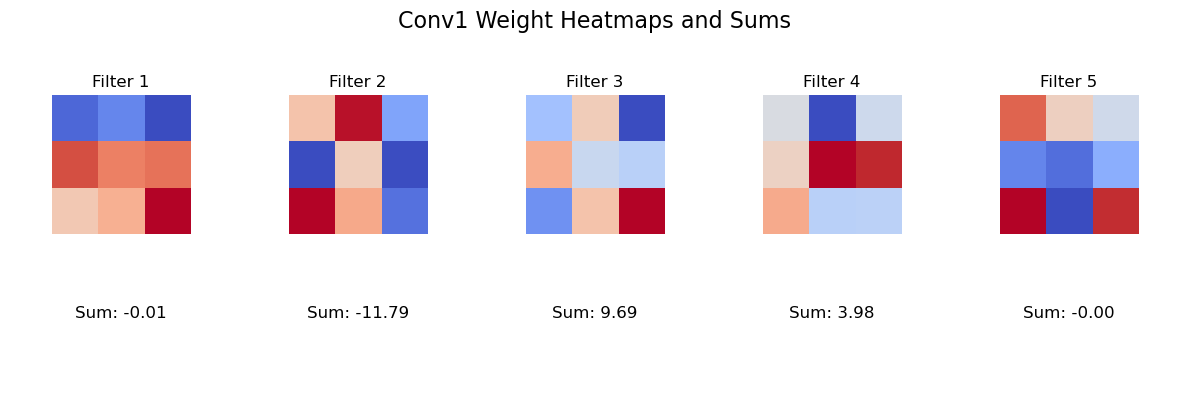

In [5]:
# 各重みフィルターに対して成分の和を計算
filter_sums = [np.sum(filter) for filter in conv1_weight_np]

# 5つの重みフィルターとその成分の和を1つの図にプロット
plt.figure(figsize=(12, 4))
for i in range(5):
    plt.subplot(2, 5, i+1)
    plt.imshow(conv1_weight_np[i, 0], cmap='coolwarm', interpolation='nearest')
    plt.title(f'Filter {i+1}')
    plt.axis('off')
    
    plt.subplot(2, 5, i+6)
    plt.text(0.5, 0.5, f'Sum: {filter_sums[i]:.2f}', fontsize=12, ha='center')
    plt.axis('off')

plt.suptitle('Conv1 Weight Heatmaps and Sums', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [6]:
fc_weight = model['fc.0.weight']
fc_weight

tensor([[-2.0463e-01,  1.4427e-02,  5.3829e-01,  ...,  8.3755e-01,
          9.0445e-01,  1.2583e+00],
        [ 7.4633e-01,  7.2673e-01,  5.8748e-01,  ...,  6.5654e-01,
          3.1112e-01, -1.8056e-01],
        [ 1.8151e-01, -2.5590e-03,  4.6984e-01,  ...,  3.3231e-01,
          1.2552e-01, -5.8095e-01],
        ...,
        [-1.0425e+00, -1.1162e+00, -9.0720e-01,  ..., -2.3528e+00,
         -3.7132e+00, -3.9025e+00],
        [-1.4951e+00, -1.0550e+00, -3.4895e-01,  ..., -3.7941e+00,
         -3.3545e+00, -3.6037e+00],
        [-1.0902e+00, -1.1133e+00, -1.4654e+00,  ..., -3.5312e+00,
         -3.3870e+00, -4.2291e+00]])

In [7]:
fc_weight.size()

torch.Size([25, 80])

In [8]:
# NumPy配列に変換
fc_weight_np = fc_weight.numpy()
# データを転置して正方形のデータに変形
fc_weight_np_square = fc_weight_np.T

In [9]:
fc_weight_np_square

array([[-2.04628035e-01,  7.46331573e-01,  1.81510895e-01, ...,
        -1.04251206e+00, -1.49506867e+00, -1.09021235e+00],
       [ 1.44271115e-02,  7.26733863e-01, -2.55898782e-03, ...,
        -1.11618924e+00, -1.05501401e+00, -1.11333752e+00],
       [ 5.38290977e-01,  5.87481558e-01,  4.69841748e-01, ...,
        -9.07196760e-01, -3.48954082e-01, -1.46536028e+00],
       ...,
       [ 8.37549925e-01,  6.56537414e-01,  3.32313746e-01, ...,
        -2.35278034e+00, -3.79412556e+00, -3.53122854e+00],
       [ 9.04446304e-01,  3.11117113e-01,  1.25515997e-01, ...,
        -3.71318316e+00, -3.35449409e+00, -3.38704777e+00],
       [ 1.25829530e+00, -1.80558309e-01, -5.80950201e-01, ...,
        -3.90248895e+00, -3.60365605e+00, -4.22908258e+00]], dtype=float32)

In [10]:
fc_weight_np_square.shape

(80, 25)

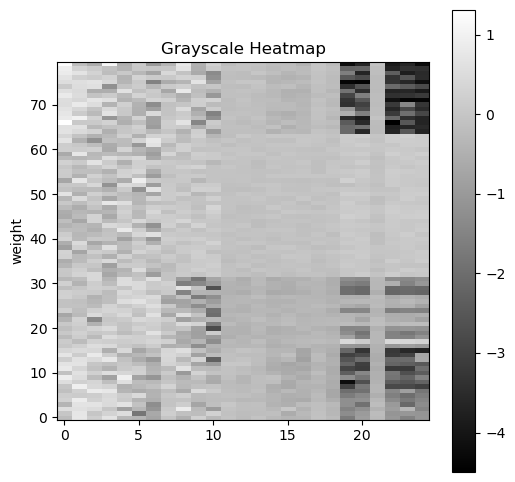

In [11]:
# ヒートマップをプロット（白黒）
plt.figure(figsize=(6, 6))
plt.imshow(fc_weight_np_square, cmap='gray', interpolation='nearest', aspect=0.30, origin='lower')
plt.colorbar()
plt.title('Grayscale Heatmap')


# x軸とy軸に名前を付ける
plt.ylabel('weight')

plt.show()

In [12]:
fc_weight_np_square_sum = np.sum(fc_weight_np_square, axis=0)
fc_weight_np_square_sum

array([ 11.804764 ,  11.860928 ,   4.132435 ,  -2.7464352,   1.1713598,
        -4.474225 , -18.108162 ,  -1.2954999,  -4.878413 , -17.314098 ,
       -32.352882 , -13.286325 , -14.349576 , -13.168835 , -19.685215 ,
       -20.980867 , -21.425573 , -13.895334 , -20.422985 , -88.41345  ,
       -93.68446  , -17.437256 , -97.90622  , -96.129    , -99.13544  ],
      dtype=float32)

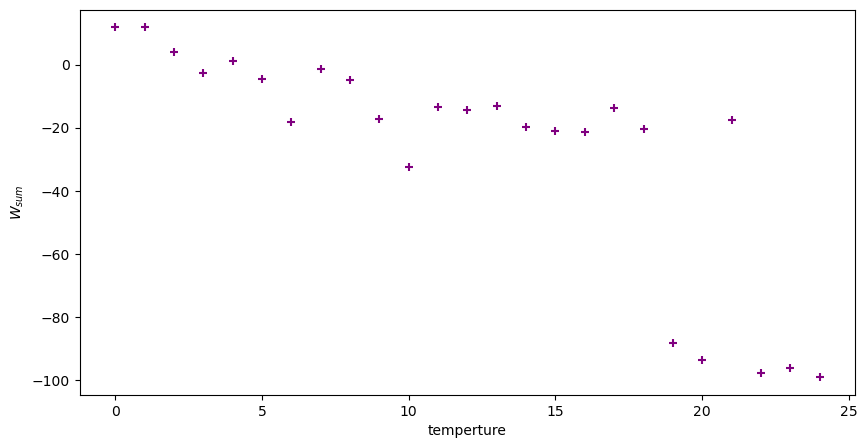

In [13]:
x = [x for x in range(len(fc_weight_np_square_sum))]
y = fc_weight_np_square_sum

# プロット
plt.figure(figsize=(10, 5))
plt.scatter(x, y, marker='+', color='purple')
plt.xlabel('temperture')
plt.ylabel('$W_{sum}$')

plt.show()

In [14]:
x_inverse = []
for val in x:
    if val != 0:
        x_inverse.append(1 / val)
    else:
        x_inverse.append(0)  # ゼロで割り算を避けるため

x_inverse

[0,
 1.0,
 0.5,
 0.3333333333333333,
 0.25,
 0.2,
 0.16666666666666666,
 0.14285714285714285,
 0.125,
 0.1111111111111111,
 0.1,
 0.09090909090909091,
 0.08333333333333333,
 0.07692307692307693,
 0.07142857142857142,
 0.06666666666666667,
 0.0625,
 0.058823529411764705,
 0.05555555555555555,
 0.05263157894736842,
 0.05,
 0.047619047619047616,
 0.045454545454545456,
 0.043478260869565216,
 0.041666666666666664]

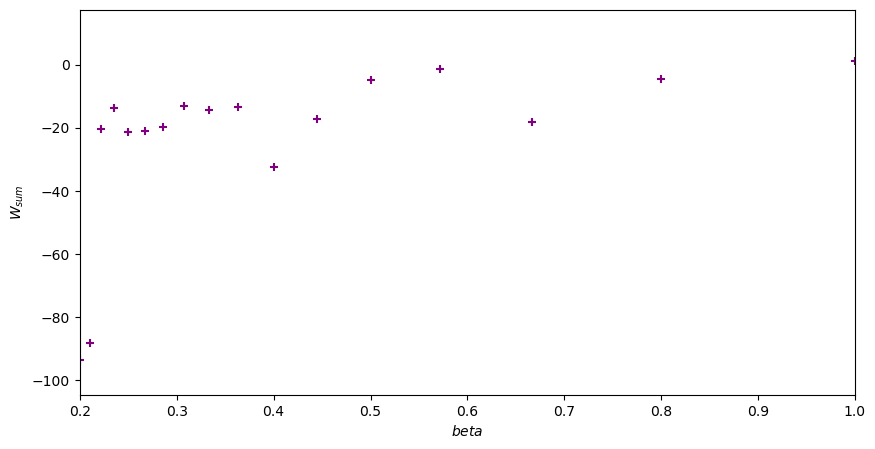

In [15]:
x = [x*0.25 for x in range(len(fc_weight_np_square_sum))]
y = fc_weight_np_square_sum

# x軸の値を逆数に変換
x_inverse = []
for val in x:
    if val != 0:
        x_inverse.append(1 / val)
    else:
        x_inverse.append(0)  # ゼロで割り算を避けるため

# プロット
plt.figure(figsize=(10, 5))
plt.scatter(x_inverse, y, marker='+', color='purple')
plt.xlabel('$beta$')
plt.ylabel('$W_{sum}$')

# x軸の範囲を指定
plt.xlim(0.2, 1) 

plt.show()